In [1]:
from sympy import *
# Use pretty printing for SymPy `expr`essions
init_printing()

def noop(*args, **kwargs):
    pass
if __name__ != '__main__':
    display = noop

# Linear ODEs: example with different real eigenvalues

In this lecture we solve the linear ODE $\dot x=Ax$, where $A=\begin{bmatrix}1&2\\2&1\end{bmatrix}$.
I will solve this ODE manually verifying each step using [Python] library [SymPy].

[Python]: https://www.python.org "Python programming language"
[SymPy]: https://www.sympy.org "Symboic math in Python"

## Eigenvalues and eigenvectors

Its [determinant] equals $-3$ and its [trace] equals $2$, hence its [characteristic polynomial] is $\lambda^2-2\lambda-3$. The [eigenvalues] of $A$ are the roots of this polynomial: $3$ and $-1$.

[determinant]: https://en.wikipedia.org/wiki/Determinant
[trace]: https://en.wikipedia.org/wiki/Trace_(linear_algebra)
[characteristic polynomial]: https://en.wikipedia.org/wiki/Characteristic_polynomial
[eigenvalues]: https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors

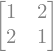

In [2]:
A = Matrix([[1, 2], [2, 1]])
display(A, A.trace(), A.det(), A.charpoly(), solve(A.charpoly().as_expr()))

Solving $Ax=\lambda x$ for $\lambda=-1, 3$, we find the corresponding eigenvectors $\begin{bmatrix}-1\\1\end{bmatrix}$ and $\begin{bmatrix}1\\1\end{bmatrix}$.

In [3]:
var('x1 x2')
x = Matrix([x1, x2])
[(λ, solve(A * x - λ * x)) for λ in sorted(A.eigenvals())]

Of course, `Python` can find eigenvalues and eigenvectors of a matrix in one line

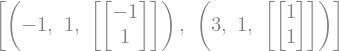

In [4]:
display(A.eigenvals(), A.eigenvects())

## Diagonalization

Therefore, $A=PDP^{-1}$, where $P=\begin{bmatrix}-1&1\\1&1\end{bmatrix}$ and $D=\begin{bmatrix}-1&0\\0&3\end{bmatrix}$. Here the columns of $P$ are the eigenvectors of $A$ and $D$ is the diagonal matrix with the eigenvalues of $A$ at the diagonal. Again, we can ask [Python] to find $P$ and $D$ without asking it for the eigenvectors first. See also Wikipedia page about [matrix diagonalization](https://en.wikipedia.org/wiki/Diagonalizable_matrix).

[Python]: https://www.python.org "Python programming language"

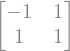

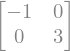

In [5]:
P, D = A.diagonalize()
display(P, D)
assert P * D * P ** -1 == A

## Formula for the solution

Recall that solutions of $\dot y=Dy$ have the form $y(t)=M(t)y(0)$, where $M(t)=\begin{bmatrix}e^{-t}&0\\0&e^{3t}\end{bmatrix}$.
For each solution $y(t)$ of $\dot y=Dy$, the function $x(t)=Py(t)=PM(t)y(0)$ is a solution of $\dot x=Ax$.
Note that $x(0)=PM(0)y(0)=Py(0)$, hence $y(0)=P^{-1}x(0)$.
Finally,
$$
x(t)=PM(t)P^{-1}x(0)=\frac{1}{2}\begin{bmatrix}e^{3t}+e^{-t}&e^{3t}-e^{-t}\\e^{3t}-e^{-t}&e^{3t}+e^{-t}\end{bmatrix}x(0).
$$

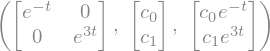

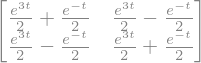

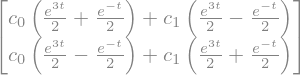

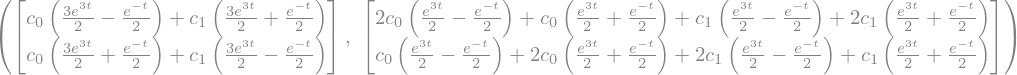

In [6]:
var('c0 c1') # Coordinates of $x(0)$
var('t') # Time
M = Matrix([[exp(D[0,0] * t), 0], [0, exp(D[1,1] * t)]])
c = Matrix([c0, c1])
y = M * c
display((M, c, y))
assert y.diff(t) == D * y
assert y.subs(t, 0) == c
x = P * M * P ** -1 * c
display(P * M * P ** -1, # Fundamental matrix of solutions
        x) # Solution with `x(0)=c`
assert x.diff(t).expand() == (A * x).expand()
assert x.subs(t, 0) == c
x.diff(t), A * x